# Names and IDs
 1. Einat Shusterman 307848952
 2. Sagi Eden 204278931

# I. Condorcet's Jury Theorem (1785)

Assume voter probability be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging)

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers)

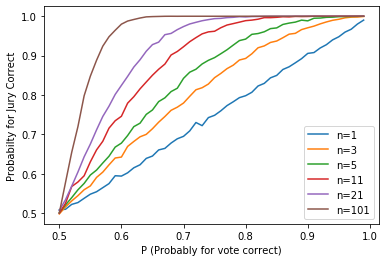

In [1]:
# Implement here
import random
import numpy
from matplotlib import pyplot as plt


def jury_decision(p, n):
    jury_list =  [random.uniform(0, 1) for _ in range(n)]
    jury_list_correctness = [1 if jury_pred <= p else -1 for jury_pred in jury_list]
    jury_correctness = sum(jury_list_correctness) > 0
#     print(jury_correctness)
    return jury_correctness
    

def jury_right_prob(p, n):
    jury_decisions = [jury_decision(p, n) for _ in range(0, 10000)]
    jury_prob = sum(jury_decisions) / len(jury_decisions)
#     print(jury_prob)
    return jury_prob
    
prob_list = numpy.arange(0.5,1,0.01)
n_list = [1, 3, 5, 11, 21, 101]

n_list_acuuracy = []
for n in n_list:
    n_p_list_accuracy = []
    for p in prob_list:
        n_p_list_accuracy.append(jury_right_prob(p, n))
    n_list_acuuracy.append(n_p_list_accuracy)

n_list_acuuracy

plt.plot(prob_list, n_list_acuuracy[0], label='n=1')
plt.plot(prob_list, n_list_acuuracy[1], label='n=3')
plt.plot(prob_list, n_list_acuuracy[2], label='n=5')
plt.plot(prob_list, n_list_acuuracy[3], label='n=11')
plt.plot(prob_list, n_list_acuuracy[4], label='n=21')
plt.plot(prob_list, n_list_acuuracy[5], label='n=101')


plt.xlabel('P (Probably for vote correct)')
plt.ylabel('Probabilty for Jury Correct')
plt.legend()
plt.show()

# II. AdaBoost
*  receive a method for creating a weak learner, which has a fit and predict methods/
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` with the next parameters:
        - *tol=1e-10, loss='hinge', C=1000, max_iter=50000*
    - Split the sample set into 2/3rd train and 1/3 test sets.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function (or your own) to plot the final decision plane of each ensemble model.
## Answer to the next questions:

 1. How does the overall train set accuracy changes with $n$?
 2. Does you model starts to overfit at some point? How can you test and detect such point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

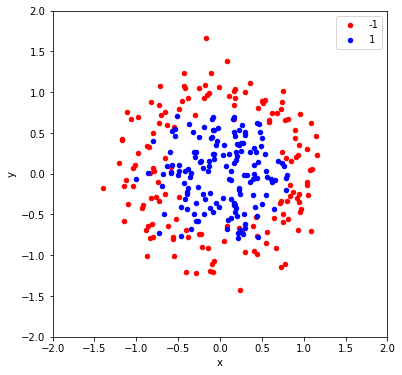

In [2]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [0]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accept X and return the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


from estimators list: [1, 3, 10, 50, 100, 1000, 10000] best estimators number is 50 with error 0.4


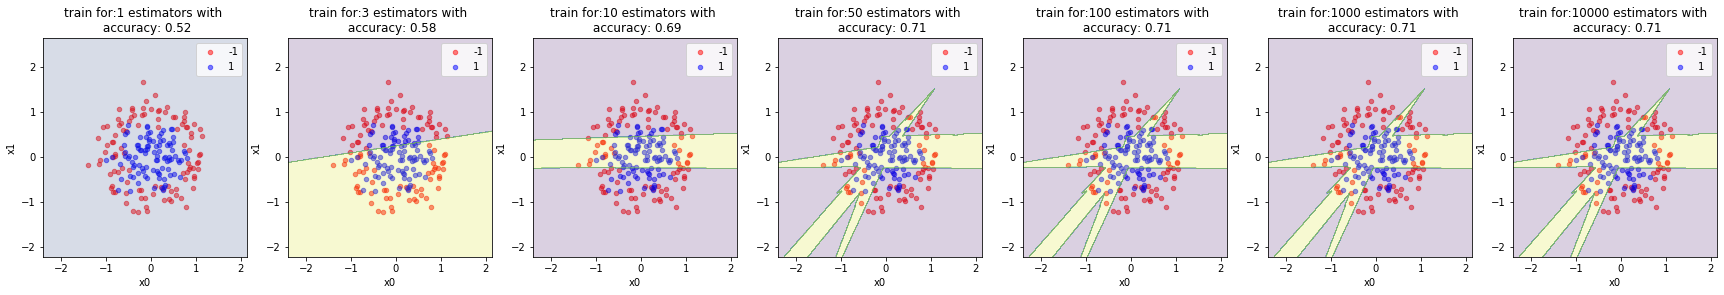

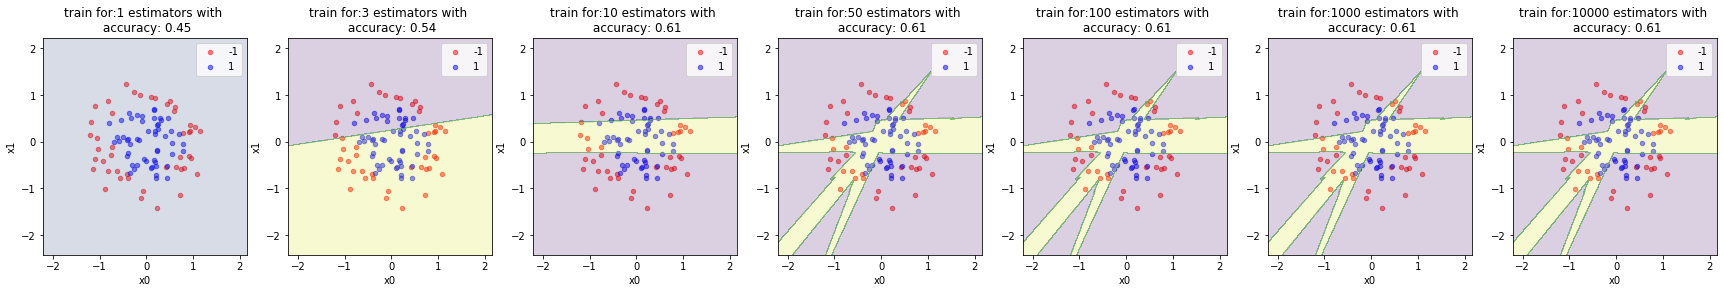

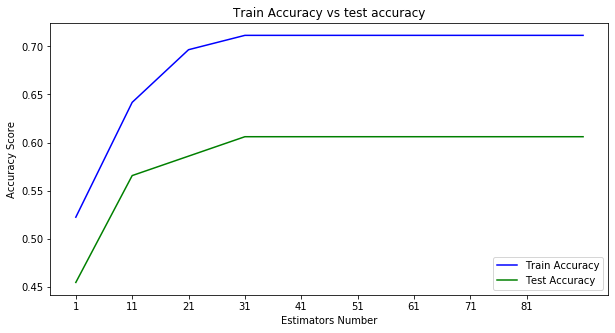

In [4]:
# Implement here
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


def plot_train_and_test_accuracy_score(train_accuracy_score, test_accuracy_score, estimators_num): 
  fig, ax = plt.subplots(figsize=(10, 5))
  ax.plot(estimators_num, train_accuracy_score, color='blue', label='Train Accuracy')        # specify color by name
  ax.plot(estimators_num, test_accuracy_score, color='g', label='Test Accuracy') 
  plt.legend(loc="lower right")
  ax.set_xticks(list(range(min(estimators_num), max(estimators_num), 10)))
  ax.set_title('Train Accuracy vs test accuracy')
  ax.set_xlabel('Estimators Number')
  ax.set_ylabel('Accuracy Score')

def check_AdaBoost(estimators_num, to_plot_train_and_test_accuracy, to_plot_predictions): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  if to_plot_predictions:
    train_fig, train_axs = plt.subplots(1, len(estimators_num), figsize=(30, 10))
    test_fig, test_axs = plt.subplots(1, len(estimators_num), figsize=(30, 10))
  train_accuracy_score_list = []
  test_accuracy_score_list = []
  linear_svc = LinearSVC(tol=1e-10, loss='hinge', C=1000, max_iter=50000)
  for index, n in enumerate(estimators_num):
    clf = AdaBoostClassifier(n_estimators=n, random_state=0, base_estimator = linear_svc, algorithm='SAMME')
    clf.fit(X_train, y_train)  
    train_accuracy_score = accuracy_score(y_train, clf.predict(X_train))
    train_accuracy_score_list.append(train_accuracy_score)
    if to_plot_predictions:
      train_axs[index].set_title('train for:'+str(n)+ ' estimators with \n accuracy: '+str(round(train_accuracy_score, 2)))
      plot_data(X_train, y_train, clf.predict, train_axs[index])
    test_accuracy_score = accuracy_score(y_test, clf.predict(X_test))
    test_accuracy_score_list.append(test_accuracy_score)
    if to_plot_predictions:
      test_axs[index].set_title('train for:'+str(n)+ ' estimators with \n accuracy: '+str(str(round(test_accuracy_score, 2))))
      plot_data(X_test, y_test, clf.predict, test_axs[index])
  if to_plot_train_and_test_accuracy:
    plot_train_and_test_accuracy_score(train_accuracy_score_list, test_accuracy_score_list, estimators_num)
  return get_best_estimators_num(clf, estimators_num)


def get_best_estimators_num(clf, estimators_num):
  estimator_errors = list(clf.estimator_errors_)
  best_estimator_index = estimator_errors.index(min(estimator_errors))
  return estimators_num[best_estimator_index], estimator_errors[best_estimator_index]

estimators_num = [1,3,10,50,100,1000,10000]
best_estimator_num, best_estimator_error = check_AdaBoost(estimators_num, False, True)
print("from estimators list: "+str(estimators_num)+" best estimators number is "+str(best_estimator_num)+" with error "+str(round(best_estimator_error, 2)))
estimators_num = [i for i in range(1,100,10)]
best_estimator_num, best_estimator_error = check_AdaBoost(estimators_num, True, False)

# Your answers here

###  I Condorcet's Jury Theorem

assumptions for the majority decision (for convienient notation):

 - p > 0 is the probablity to one judge to be correct.
 - each judge answer +1 in probability p and -1 in probabilty 1-p.
 - the decision of the jury majority is : +1 if the sum of judgs answers > 0, and -1 otherwise
 
 Xi = decision of each judge between i to N (number of judges)
 proof:
 Let a = p − 1/2 > 0
 E[Xi] = −(1/2 − a) + ( 1/2 + a) = 2a > 0
  
Using the weak law of large numbers, we get that Sn/N (sum of answers divided by count of jurys) converge in probabilty to E[Xi]. which means that when n -> inf, the probability the Sn/N will be equal E[Xi] (and hence positive) grows.

And Formally: for any e1,e2 > 0 there is N large enough such that for every

n ≥ N: P(|Sn/n − E[Xi]| < e1) > 1 − e2.

Taking e1 = 2a. we se that the probability of a correct decision is:
    P (Sn > 0) = P (Sn/n > 0) >= P ( |Sn/n -2a| < 2a ) -> 1.
    

###  II AdaBoost

##### 1.
The accuracy keeps growing from n=1 to n= 50 fast until it converges to 0.71

##### 2.
No.
In this task we can see that when n (the number of estimators) grows, the accuracy reach to max value (0.71) and remains there. which mean that adding estimators does not reduces the accuracy).
To detec over-fitting we would expect to see in the graph that the test-set accuracy starting to reduce in some point (even though the train-set accuracy keeps growing)

##### 3.

Using the estimator_errors_ attribute we get that from n ∈ [1, 3, 10, 50, 100, 1000, 10000] list n=50 is the minimun n_estimators that gave the minimum test_error (0.4) and maximum accuracy (0.71).

Therefore the Optimal number of estimators from the list we got is 50.
